In [1]:
import os, cv2, re, random
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
def prepare_data(list_of_images,img_width,img_height):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'Flame' in i:
            y.append(1)
        else:
            y.append(0)
        #else:
            #print('neither cat nor dog name present in images')
            
    return x, y

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
FLAME_MODEL_TEST_DIR = 'test_model/'
Flame_modeltest_images = [FLAME_MODEL_TEST_DIR+i for i in os.listdir(FLAME_MODEL_TEST_DIR)]

In [ ]:
Y_test32_predicted_labels = []
X_test32, Y_test32 = prepare_data(Flame_modeltest_images,32,32)

#Load the Flame Model
Flame_model_32 = load_model('flame_model_32x32.h5')
Y_test32_predicted = Flame_model_32.predict(np.array(X_test32))
for i in range(0,len(Flame_modeltest_images)):
    if Y_test32_predicted[i, 0] >= 0.5: 
        Y_test32_predicted_labels.append(1)
        #print("Model predicts the image {} as Flame".format(Flame_modeltest_images[i]))
    else:
        Y_test32_predicted_labels.append(0)
        #print("Model predicts the image {} No_Flame".format(Flame_modeltest_images[i]))
    #plt.imshow(X_FMT[i])   
    #plt.show()

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test32,Y_test32_predicted_labels) 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = ['No_Flame','Flame'])  

In [ ]:
Y_test64_predicted_labels = []
X_test64, Y_test64 = prepare_data(Flame_modeltest_images,64,64)

#Load the Flame Model
Flame_model_64 = load_model('flame_model_64x64.h5')
Y_test64_predicted = Flame_model_64.predict(np.array(X_test64))
for i in range(0,len(Flame_modeltest_images)):
    if Y_test64_predicted[i, 0] >= 0.5: 
        Y_test64_predicted_labels.append(1)
        #print("Model predicts the image {} as Flame".format(Flame_modeltest_images[i]))
    else:
        Y_test64_predicted_labels.append(0)
        #print("Model predicts the image {} No_Flame".format(Flame_modeltest_images[i]))
    #plt.imshow(X_FMT[i])   
    #plt.show()

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test64,Y_test64_predicted_labels) 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = ['No_Flame','Flame'])  

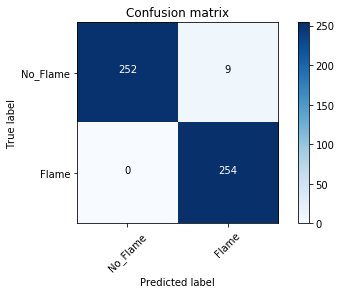

In [5]:
Y_test224_predicted_labels = []
X_test224, Y_test224 = prepare_data(Flame_modeltest_images,224,224)

#Load the Flame Model
Flame_model_224 = load_model('flame_model_224x224.h5')
Y_test224_predicted = Flame_model_224.predict(np.array(X_test224))
for i in range(0,len(Flame_modeltest_images)):
    if Y_test224_predicted[i, 0] >= 0.5: 
        Y_test224_predicted_labels.append(1)
        #print("Model predicts the image {} as Flame".format(Flame_modeltest_images[i]))
    else:
        Y_test224_predicted_labels.append(0)
        #print("Model predicts the image {} No_Flame".format(Flame_modeltest_images[i]))
    #plt.imshow(X_FMT[i])   
    #plt.show()

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test224,Y_test224_predicted_labels) 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = ['No_Flame','Flame']) 

In [ ]:
import time
image = 'test_model/Flame.0.jpg'
start = time.time()
x =(cv2.resize(cv2.imread(image), (96,96), interpolation=cv2.INTER_AREA))
end = time.time()
plt.imshow(x)   
plt.show()
elapsed = end - start
print(elapsed)

In [18]:
from numpy import zeros, newaxis
# Create a VideoCapture object and read from input file
# If the input is video, pass the video file name
cap = cv2.VideoCapture('Model_Inputs/Flame_Validate.AVI')

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = 224
frame_height = 224

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('Model_outputs/Flame_Validate_out.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

#Read and display video frames until video is completed or 
#user quits by pressing ESC
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    #Resize the video frame
    image = cv2.resize(frame, (224, 224),interpolation=cv2.INTER_CUBIC)
    img_4d = image[newaxis,:,:,:]
    pred = Flame_model_224.predict(img_4d)
    print(pred)
    # Display the resulting frame
    cv2.putText(image, "Model Predicts ", (20, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
    if pred[0, 0] >= 0.5 :
        cv2.putText(image, "As: " + str("FLAME   "), (20, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    else:
        cv2.putText(image, "As: " + str("No_FLAME"), (20, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    #cv2.imshow('Frame',image)  
    # Write the frame into the file 'output.avi'
    out.write(image)
    # Press esc on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == 27:
      break

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()
out.release()

# Closes all the frames
cv2.destroyAllWindows()

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[6.7751404e-10]]
[[0.]]
[[0.]]
[[8.195232e-25]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]

[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.463288e-11]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.6856156e-19]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]

In [15]:
from numpy import zeros, newaxis
# Create a VideoCapture object and read from input file
# If the input is video, pass the video file name
cap = cv2.VideoCapture('Model_Inputs/Flame_Validate.AVI')

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = 224
frame_height = 224

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('Model_outputs/Flame_Validate_out.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

#Read and display video frames until video is completed or 
#user quits by pressing ESC
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    #Resize the video frame
    image = cv2.resize(frame, (224, 224),interpolation=cv2.INTER_CUBIC)
    img_4d = image[newaxis,:,:,:]
    pred = Flame_model_224.predict(img_4d)
    print(pred)
    # Display the resulting frame
    cv2.putText(image, "Model Predicts ", (20, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
    if pred[0, 0] >= 0.5 :
        cv2.putText(image, "As: " + str("FLAME   "), (20, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    else:
        cv2.putText(image, "As: " + str("No_FLAME"), (20, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    #cv2.imshow('Frame',image)  
    # Write the frame into the file 'output.avi'
    out.write(image)
    # Press esc on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == 27:
      break

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()
out.release()

# Closes all the frames
cv2.destroyAllWindows()

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[6.7751404e-10]]
[[0.]]
[[0.]]
[[8.195232e-25]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]

[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.463288e-11]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.6856156e-19]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]

In [16]:
FLAME_MODEL_TEST_DIR = 'Output/'
img_width = 224
img_height = 224
Flame_modeltest_images = [FLAME_MODEL_TEST_DIR+i for i in os.listdir(FLAME_MODEL_TEST_DIR)]
Y_pred_test_labels = []
X_FMT, Y_FMT = prepare_data(Flame_modeltest_images,img_width,img_height)
 
Y_FMT_pred = Flame_model_224.predict(np.array(X_FMT))
for i in range(0,len(Flame_modeltest_images)):
    if Y_FMT_pred[i, 0] >= 0.5: 
        Y_pred_test_labels.append(1)
        #print("Model predicts the image {} as Flame".format(Flame_modeltest_images[i]))
    else:
        Y_pred_test_labels.append(0)
        #print("Model predicts the image {} No_Flame".format(Flame_modeltest_images[i]))
    #if ( Y_FMT[i] != Y_pred_test_labels[i] ):
        #print("Model fails with the image {}".format(Flame_modeltest_images[i]))
  
    print("Model fails with the image {}".format(Flame_modeltest_images[i]))    
    print(Y_FMT_pred[i, 0])
 

Model fails with the image Output/test.1000.jpg
1.0
Model fails with the image Output/test.1001.jpg
1.0
Model fails with the image Output/test.1002.jpg
1.0
Model fails with the image Output/test.1003.jpg
1.0
Model fails with the image Output/test.1004.jpg
1.0
Model fails with the image Output/test.1005.jpg
1.0
Model fails with the image Output/test.1006.jpg
1.0
Model fails with the image Output/test.1007.jpg
1.0
Model fails with the image Output/test.1008.jpg
1.0
Model fails with the image Output/test.1009.jpg
1.0
Model fails with the image Output/test.1010.jpg
1.0
Model fails with the image Output/test.1011.jpg
1.0
Model fails with the image Output/test.1012.jpg
1.0
Model fails with the image Output/test.1013.jpg
1.0
Model fails with the image Output/test.1014.jpg
1.0
Model fails with the image Output/test.1015.jpg
1.0
Model fails with the image Output/test.1016.jpg
1.0
Model fails with the image Output/test.1017.jpg
1.0
Model fails with the image Output/test.1018.jpg
1.0
Model fails 

In [ ]:
from numpy import zeros, newaxis
x =[]
y=[]
image = 'test_model/Flame.0.jpg'
x.append(cv2.resize(cv2.imread(image), (224,224), interpolation=cv2.INTER_AREA))
image = 'test_model/Flame.0.jpg'
x.append(cv2.resize(cv2.imread(image), (224,224), interpolation=cv2.INTER_AREA))
pred = Flame_model_224.predict(np.array(x))
z = cv2.resize(cv2.imread(image), (224,224), interpolation=cv2.INTER_AREA)
z_new = z[newaxis,:,:,:]

y = np.array(x)
pred = Flame_model_224.predict(y)
pred1 = Flame_model_224.predict(z_new)
print(y.shape,y.ndim)
print(z.shape,z.ndim)
print(z_new.shape,z_new.ndim)
pred1